In [1]:
import pennylane as qml
from pennylane import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

In [2]:
# test_input = [[[1.0472, 0.7854, 3.1416, 0.3927],
#                [1.0472, 0.7854, 3.1416, 0.5236]],
#                [[1.0472, 0.7854, 1.5708, 0.3927],
#                [0.7854, 0.7854, 1.5708, 0.7854]]],

In [3]:
def W(params):

    for i in range(len(params)):
        for j in range(len(params[i])):
            qml.RY(params[i][j], wires=j)
        for j in range(len(params[i])):
            qml.CNOT(wires=[j, (j+1) % len(params[i])])
    
    #LATEST VERSION
    
    # for layer in params[i]:
    #     for wire in range(len(layer)):
    #         qml.RY(layer[wire], wires=wire)
    #     for wire in range(len(layer)):
    #         qml.CNOT(wires=[wire, (wire+1)%len(layer)])





    
    
    # for i in range(len(params)): #depth
    #     for j in range(len(params[i])): #n_qubits
    #         qml.RY(params[i][j], wires=j)
    #         qml.CNOT(wires=[j, (j+1) % len(params[i])])

    # n_qubits = len(params[0])
    # depth = len(params)

    # # for i in range(depth):
    # #     for j in range(n_qubits):
            

    # for i in range(depth):
    #         # qml.RY(params[i][j], wires=j)
    #     for j in range(n_qubits):
    #         qml.RY(params[i][j], wires=j)
    #         qml.CNOT(wires=[j, (j+1) % n_qubits])

In [4]:
params = [[[1.0472, 0.7854, 3.1416, 0.3927],
               [1.0472, 0.7854, 3.1416, 0.5236]],
               [[1.0472, 0.7854, 1.5708, 0.3927],
               [0.7854, 0.7854, 1.5708, 0.7854]]],

In [5]:
print(len(params))
print(len(params[0]))
print(len(params[0][0]))
print(len(params[0][0][0]))

1
2
2
4


In [6]:
for i in range(len(params)):
    for j in range(len(params[i]) - 1):
        print(i)
        print(j)

0
0


In [7]:
print(params[0])

[[[1.0472, 0.7854, 3.1416, 0.3927], [1.0472, 0.7854, 3.1416, 0.5236]], [[1.0472, 0.7854, 1.5708, 0.3927], [0.7854, 0.7854, 1.5708, 0.7854]]]


In [8]:
print(params[0][0])
print(params[0][1])

[[1.0472, 0.7854, 3.1416, 0.3927], [1.0472, 0.7854, 3.1416, 0.5236]]
[[1.0472, 0.7854, 1.5708, 0.3927], [0.7854, 0.7854, 1.5708, 0.7854]]


In [9]:
print(params[0][0][0])
print(params[0][0][1])
print(params[0][1][0])
print(params[0][1][1])

[1.0472, 0.7854, 3.1416, 0.3927]
[1.0472, 0.7854, 3.1416, 0.5236]
[1.0472, 0.7854, 1.5708, 0.3927]
[0.7854, 0.7854, 1.5708, 0.7854]


In [10]:
# for i in range(len(params[0][0])):
#     # print(i)
#     # print(params[0][i])
#     for j in range(len(params[0][0][0])):
#         print(params[0][i][j])

print(getattr(qml, 'PauliX'))

g_gate = getattr(qml, 'PauliX')
g_gate(wires=i)

<class 'pennylane.ops.qubit.non_parametric_ops.PauliX'>


PauliX(wires=[0])

In [11]:
def S(g, x, num_wires):
    for i in range(num_wires):
        # g(wires=i)
        # if g == 'PauliX':
        if g == qml.PauliX:
            # qml.RX(-2 * x, wires=i)
            qml.RX(-2 * x, wires=i)
        # if g == 'PauliY':
        if g == qml.PauliY:
            # qml.RY(-2 * x, wires=i)
            qml.RY(-2 * x, wires=i)


In [12]:
dev = qml.device('default.qubit', wires=4)
# dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev, level = 'device')
def quantum_model(param_set, g, x):
    num_blocks = len(param_set)

    for i in range(num_blocks):
        W(param_set[i])

        if i < num_blocks - 1:
            S(g, x, len(param_set[i][0]))
    # for i in range(len(param_set)):
        
    #     W(param_set)
    #     if i < num_layers:
    #         S(g, x, len(param_set[0][0]))
    return qml.probs(wires=0)

/home/dalopezm/miniconda3/envs/SPIE2024-GPU/lib/python3.10/site-packages/pennylane/qnode.py:400: UserWarning: Received gradient_kwarg level, which is not included in the list of standard qnode gradient kwargs.
  warnings.warn(


In [13]:
num_layers = len(params)
# print(num_layers)
print(num_layers)

for i, layer in enumerate(params):
    # print(layer)
    # print(len(layer))
    # print(i)
    print(len(layer))
    print(len(layer[0]))

1
2
2


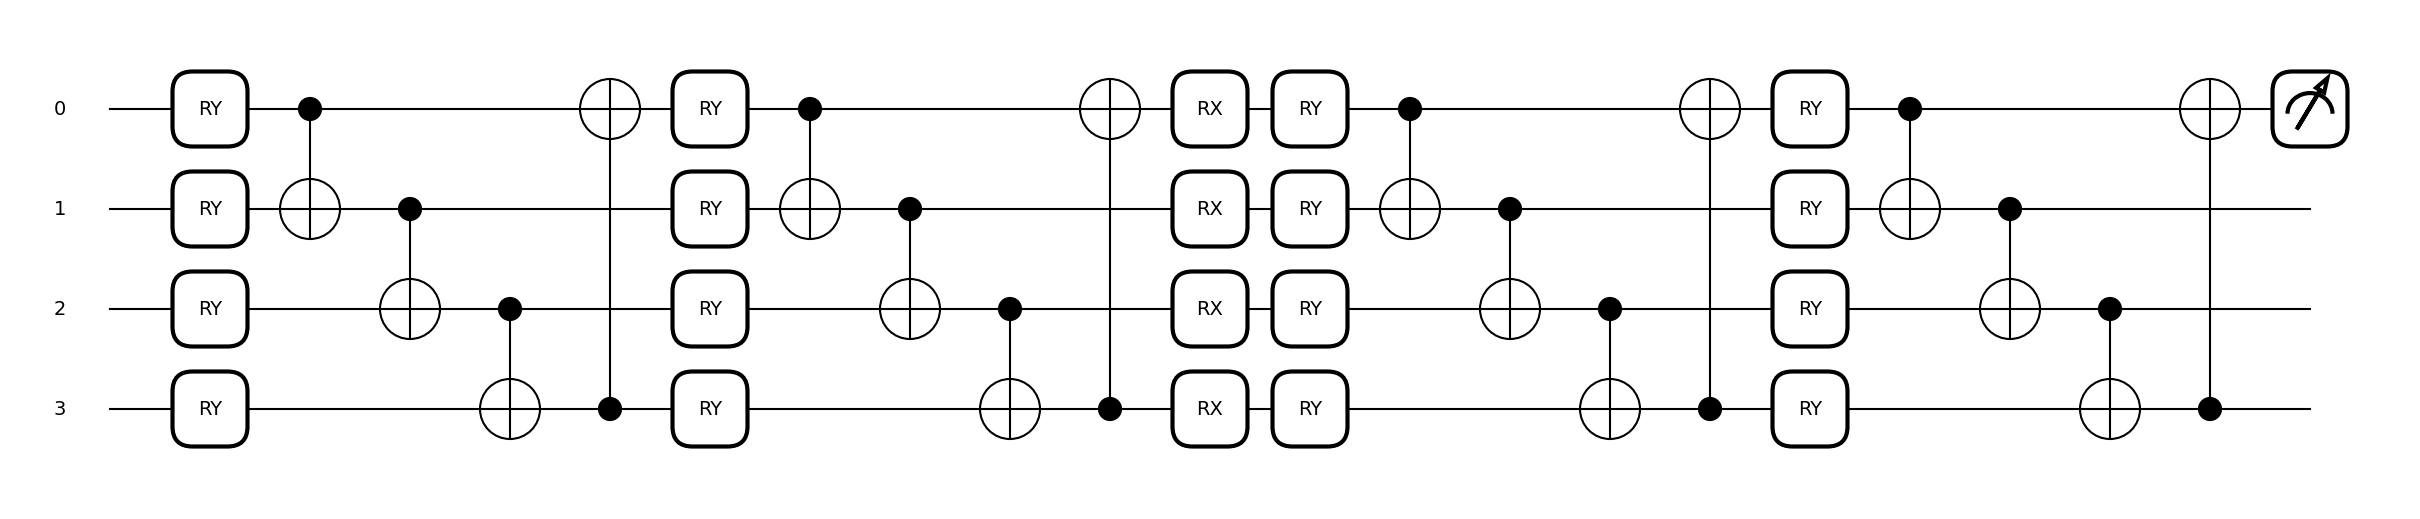

In [14]:
test_input = [[[1.0472, 0.7854, 3.1416, 0.3927],[1.0472, 0.7854, 3.1416, 0.5236]], [[1.0472, 0.7854, 1.5708, 0.3927], [0.7854, 0.7854, 1.5708, 0.7854]]]

g_string = "PauliX"
g_string = getattr(qml, g_string)

x_scalar = 0.7854

test_input_2 = [[[0.62832, 0.3927, 1.0472, 0.7854],
                    [0.7854, 0.31416, 0.62832, 0.5236]],
                    [[0.31416, 0.7854, 0.7854, 0.3927],
                    [0.31416, 0.3927, 0.31416, 0.3927]]]

g_string_2 = "PauliY"
g_string_2 = getattr(qml, g_string_2)

x_scalar_2 = 0.5236

fig, ax = qml.draw_mpl(quantum_model)(test_input, g_string, x_scalar)
# fig, ax = qml.draw_mpl(quantum_model)(test_input_2, g_string_2, x_scalar_2)
plt.show()

In [15]:
output = quantum_model(test_input, g_string, x_scalar)
# output = quantum_model(test_input_2, g_string_2, x_scalar_2)
print('probs on wire 0:', output)
print('shape:', output.shape)

probs on wire 0: [0.46652954 0.53347046]
shape: (2,)


In [ ]:
# !pip install pennylane

In [ ]:
# load MNIST and filter digits 0 and 1
# transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
# trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [ ]:
digits = load_digits(n_class=2)
X = digits.data
y = digits.target

In [ ]:
X = StandardScaler().fit_transform(X)
X = X[:, :4]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# #filter labels 0 and 1
# train_data = [(x,y) for x, y in trainset if y in [0, 1]]
# test_data = [(x, y) for x, y in testset if y in [0, 1]]

# # flatten images and normalize
# X_train = torch.stack([x.flatten() for x, y in train_data]).numpy()
# y_train = np.array([y for x, y in train_data], dtype=int)
# X_test = torch.stack([x.flatten() for x, y in test_data]).numpy()
# y_test = np.array([y for x, y in test_data], dtype=int)

# X_train_dv = X_train * np.pi / 255.0
# X_train_cv = X_train / 255.0
# X_test_dv = X_test * np.pi / 255.0
# X_test_cv = X_test / 255.0

In [ ]:
n_qubits = 4
n_layers = 3
dev = qml.device('default.qubit', wires=n_qubits)

def layer(x, w):
    for i in range(n_qubits):
        qml.RY(x[i], wires=i)
        qml.RY(w[i], wires=i)
    for i in range(n_qubits):
        qml.CNOT(wires=[i, (i + 1) % n_qubits])

@qml.qnode(dev)
def dv_circuit(x, weights):
    for l in range(n_layers):
        layer(x, weights[l])
    return qml.expval(qml.PauliZ(0))

In [ ]:
sample_x = X_train[0]
sample_weights = np.random.randn(n_layers, n_qubits)

drawer = qml.draw_mpl(dv_circuit)
drawer(sample_x, sample_weights)

In [ ]:
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def accuracy(y_true, y_pred):
    return np.mean(np.round(y_pred) == y_true)

In [ ]:
weights = 0.01 * np.random.randn(n_layers, n_qubits, requires_grad=True)
opt = qml.AdamOptimizer(stepsize=0.01)
epochs = 100
batch_size = 32

train_loss_hist, val_loss_hist = [], []
train_acc_hist, val_acc_hist = [], []

for epoch in range(epochs):
    permutation = np.random.permutation(len(X_train))
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation]

    epoch_loss = 0
    batch_bar = tqdm(
        range(0, len(X_train), batch_size),
        desc=f'Epoch {epoch+1}/{epochs}',
        leave=False
    )

    # for i in range(0, len(X_train), batch_size):
    for i in batch_bar:
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]

        def cost(w):
            preds = [dv_circuit(x, w) for x in X_batch]
            return mse_loss(y_batch, np.array(preds))

        # weights, batch_loss = opt.step(cost, weights)
        weights, batch_loss = opt.step_and_cost(cost, weights)
        epoch_loss += batch_loss

        batch_bar.set_postfix(batch_loss=f'{batch_loss:.4f}')

    train_preds = np.array([dv_circuit(x, weights) for x in X_train])
    val_preds = np.array([dv_circuit(x, weights) for x in X_val])

    train_loss = mse_loss(y_train, train_preds)
    val_loss = mse_loss(y_val, val_preds)
    train_acc = accuracy(y_train, train_preds)
    val_acc = accuracy(y_val, val_preds)

    train_loss_hist.append(train_loss)
    val_loss_hist.append(val_loss)
    train_acc_hist.append(train_acc)
    val_acc_hist.append(val_acc)

    print(f'epoch {epoch+1}/{epochs} | train loss: {train_loss:.4f} | val loss: {val_loss:.4f} | train acc: {train_acc:.4f} | val acc: {val_acc:.4f}')
    

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss_hist, label='train loss')
plt.plot(val_loss_hist, label='val loss')
plt.xlabel('epoch')
plt.ylabel('mse loss')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_acc_hist, label= 'train acc')
plt.plot(val_acc_hist, label='val acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()